## 6.5 Unsupervised Machine Learning 

### The script contains:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. k-means clustering when no outliers
#### 5. Statistics

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.


In [2]:
path = r'C:\Users\Lenovo\AirBnB Analysis\02 Data\Prepared Data'

In [3]:
df = pd.read_pickle(os.path.join(path, 'AirBnB_series_maps.pkl'))

In [8]:
df.shape

(51707, 25)

In [9]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,WeekTime,satisfaction,price,eu_country
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Very Satisfied,regular,Netherlands
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Satisfied,regular,Netherlands
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Satisfied,regular,Netherlands
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Very Satisfied,regular,Netherlands
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Very Satisfied,regular,Netherlands


In [10]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'WeekTime', 'satisfaction',
       'price', 'eu_country'],
      dtype='object')

In [11]:
# Renaming columns
df.rename(columns = {'realSum' : 'full_price', 'City': 'city', 'WeekTime': 'week_time', 'dist': 'distance_to_center', 'metro_dist': 'distance_to_metro', 'price' : 'price_level'}, inplace = True)

In [12]:
df.columns

Index(['Unnamed: 0', 'full_price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'distance_to_center', 'distance_to_metro', 'attr_index',
       'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat',
       'city', 'week_time', 'satisfaction', 'price_level', 'eu_country'],
      dtype='object')

In [13]:
# selecting necessary columns and putting them in a list called columns
columns = ["full_price","person_capacity", "cleanliness_rating", "guest_satisfaction_overall", "person_capacity", "distance_to_center", "distance_to_metro"]

In [14]:
df_numerical = df[columns]

In [15]:
df_numerical.head()

,full_price,person_capacity,cleanliness_rating,guest_satisfaction_overall,person_capacity,distance_to_center,distance_to_metro
0,194.033698,2.0,10.0,93.0,2.0,5.022964,2.539380
1,344.245776,4.0,8.0,85.0,4.0,0.488389,0.239404
2,264.101422,2.0,9.0,87.0,2.0,5.748312,3.651621
3,433.529398,4.0,9.0,90.0,4.0,0.384862,0.439876
4,485.552926,2.0,10.0,98.0,2.0,0.544738,0.318693


#### 2. The elbow technique


In [16]:
# Defining potential clusters and k-means
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
# Creating a score to reperesent a rate of variation for given cluster 
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]

score

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\skl

[-5565681268.840939,
 -3047090655.2775097,
 -1583090113.351429,
 -1033225212.7359661,
 -709781009.5457958,
 -473063970.8585765,
 -335655354.4948797,
 -255427834.1755851,
 -209868967.01691717]

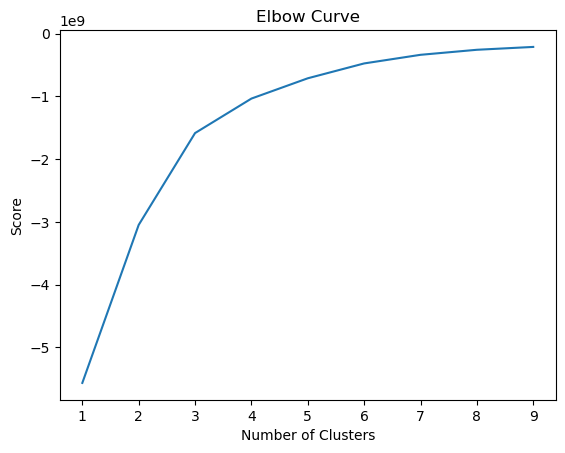

In [18]:
# Creating elbow plot

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are visible jumps from one to two, then to three and after that the line is relatively flat. Optimal number of clusters seems to be 4. 

#### 3. k-means clustering

In [19]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4) 

In [20]:
# Fitting k-means object to the data

kmeans.fit(df_numerical)

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [21]:
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\910504188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['clusters'] = kmeans.fit_predict(df_numerical)


In [23]:
df_numerical.head(15)

,full_price,person_capacity,cleanliness_rating,guest_satisfaction_overall,person_capacity,distance_to_center,distance_to_metro,clusters
0,194.033698,2.0,10.0,93.0,2.0,5.022964,2.539380,0
1,344.245776,4.0,8.0,85.0,4.0,0.488389,0.239404,0
2,264.101422,2.0,9.0,87.0,2.0,5.748312,3.651621,0
3,433.529398,4.0,9.0,90.0,4.0,0.384862,0.439876,3
4,485.552926,2.0,10.0,98.0,2.0,0.544738,0.318693,3
5,552.808567,3.0,8.0,100.0,3.0,2.131420,1.904668,3
6,215.124317,2.0,10.0,94.0,2.0,1.881092,0.729747,0
7,2771.307384,4.0,10.0,100.0,4.0,1.686807,1.458404,2
8,1001.804420,4.0,9.0,96.0,4.0,3.719141,1.196112,3
9,276.521454,2.0,10.0,88.0,2.0,3.142361,0.924404,0


In [24]:
df_numerical['clusters'].value_counts()

0    42263
3     8842
2      580
1       22
Name: clusters, dtype: int64

In [25]:
df_numerical.columns

Index(['full_price', 'person_capacity', 'cleanliness_rating',
       'guest_satisfaction_overall', 'person_capacity', 'distance_to_center',
       'distance_to_metro', 'clusters'],
      dtype='object')

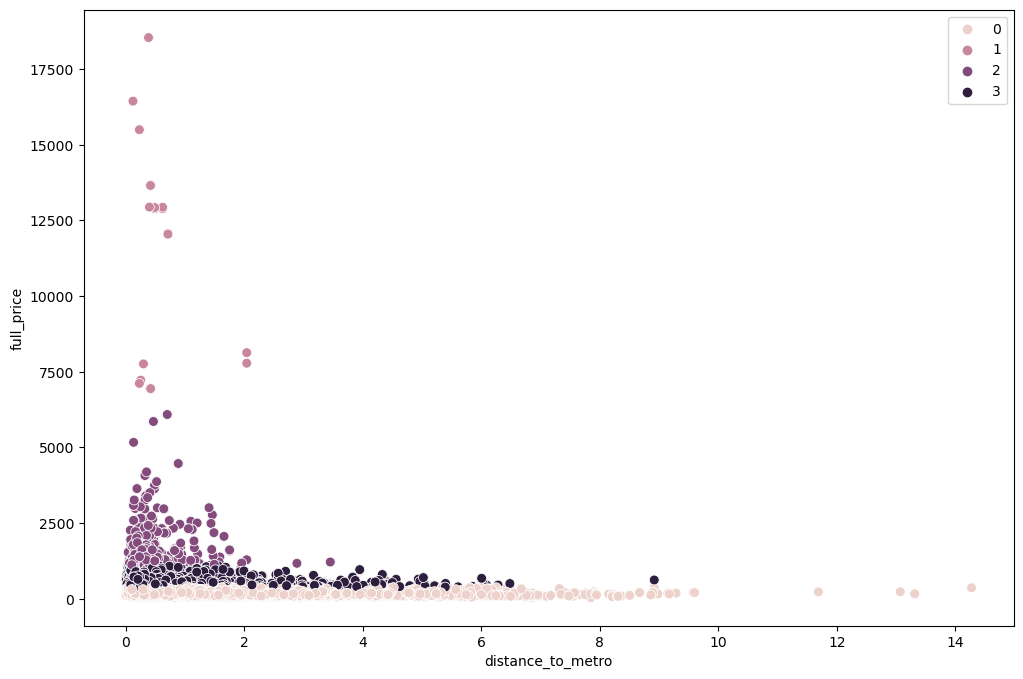

In [27]:
# Plotting clusters for: distance_to_metro and full_price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['distance_to_metro'], y=df_numerical['full_price'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('distance_to_metro')
plt.ylabel('full_price') 
plt.show()

### 4. k-means clustering when no outliers

In [30]:
# Removing outliers
df_no_out = df_numerical[df_numerical['distance_to_metro'] <=6] 

In [31]:
# Removing outliers
df_norm = df_no_out[df_no_out['full_price'] <=1500] 

In [54]:
# Removing outliers
df_noout = df_norm[df_norm['distance_to_center'] <=15] 

In [34]:
df_numerical.shape

(51707, 8)

In [55]:
df_noout.shape

(51133, 8)

In [56]:
# Defining potential clusters and k-means
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [57]:
# Creating a score to reperesent a rate of variation for given cluster 
score = [kmeans[i].fit(df_noout).score(df_noout) for i in range(len(kmeans))]

score

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda33\lib\site-packages\skl

[-1761817155.0492,
 -631714612.6996468,
 -324248771.6884665,
 -194399131.61429602,
 -130245331.79162255,
 -94068384.90890618,
 -71819143.2423513,
 -55385363.946290724,
 -45009349.00386191]

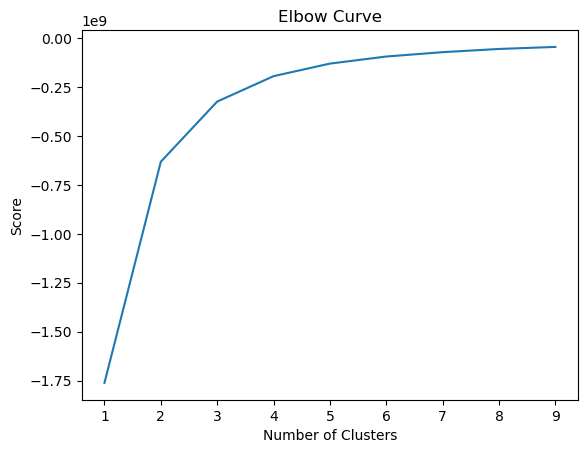

In [60]:
# Creating elbow plot

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Tthere is big jump from one to two and then visible jump to three. After that the line looks relatively flat, therefore 3 clusters seem to be optimal.

In [61]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [62]:
# Fitting k-means object to the data

kmeans.fit(df_noout)

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [63]:
df_noout['clusters'] = kmeans.fit_predict(df_noout)

C:\Users\Lenovo\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\4112185717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout['clusters'] = kmeans.fit_predict(df_noout)


In [64]:
df_noout.head(15)

,full_price,person_capacity,cleanliness_rating,guest_satisfaction_overall,person_capacity,distance_to_center,distance_to_metro,clusters
0,194.033698,2.0,10.0,93.0,2.0,5.022964,2.539380,0
1,344.245776,4.0,8.0,85.0,4.0,0.488389,0.239404,2
2,264.101422,2.0,9.0,87.0,2.0,5.748312,3.651621,0
3,433.529398,4.0,9.0,90.0,4.0,0.384862,0.439876,2
4,485.552926,2.0,10.0,98.0,2.0,0.544738,0.318693,2
5,552.808567,3.0,8.0,100.0,3.0,2.131420,1.904668,2
6,215.124317,2.0,10.0,94.0,2.0,1.881092,0.729747,0
8,1001.804420,4.0,9.0,96.0,4.0,3.719141,1.196112,1
9,276.521454,2.0,10.0,88.0,2.0,3.142361,0.924404,0
10,909.474375,2.0,10.0,96.0,2.0,1.009922,0.917115,1


In [78]:
df_noout['clusters'].value_counts()

0    36233
2    12192
1     2708
Name: clusters, dtype: int64

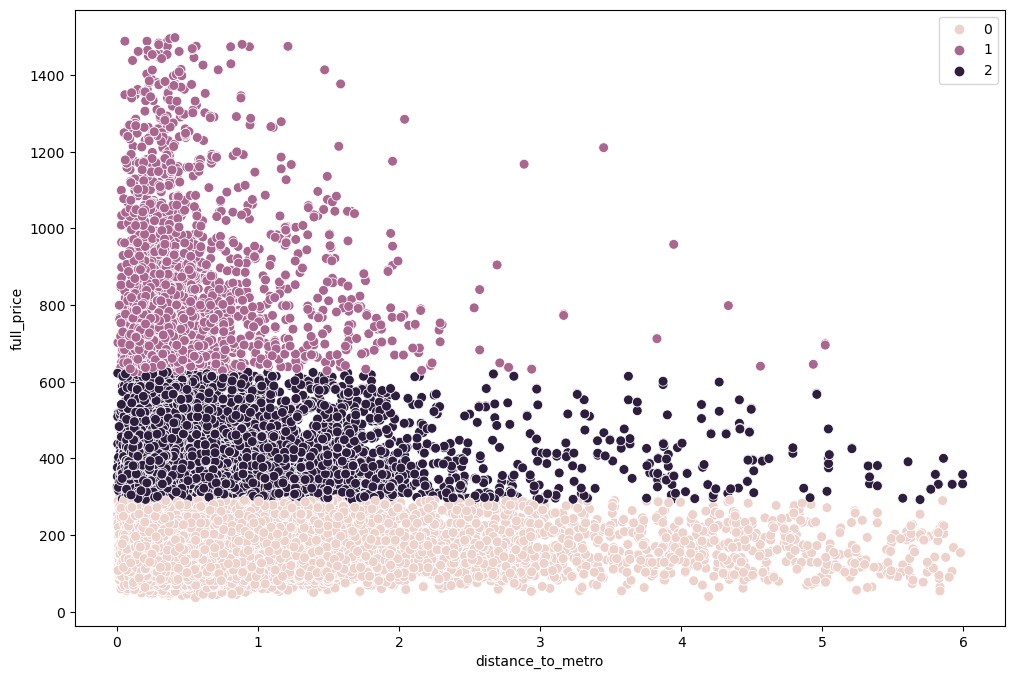

In [66]:
# Plotting clusters for: distance_to_metro and full_price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_noout['distance_to_metro'], y=df_noout['full_price'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('distance_to_metro')
plt.ylabel('full_price') 
plt.show()

In [79]:
df_noout['clusters'].value_counts()

0    36233
2    12192
1     2708
Name: clusters, dtype: int64

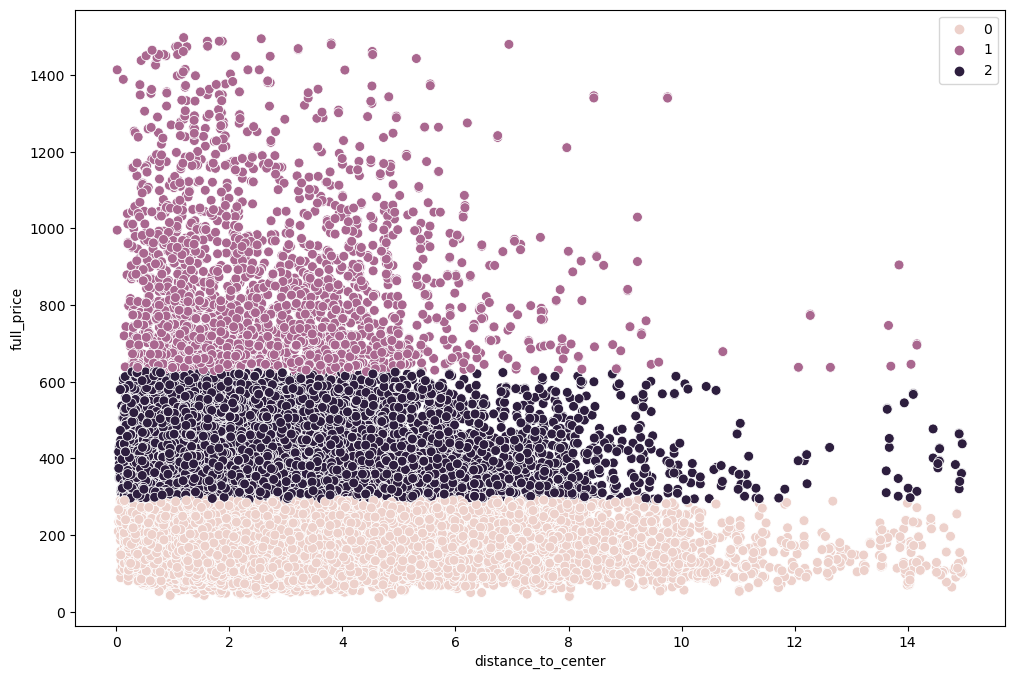

In [75]:
# Plotting clusters for: distance_to_center and full_price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_noout['distance_to_center'], y=df_noout['full_price'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('distance_to_center')
plt.ylabel('full_price') 
plt.show()

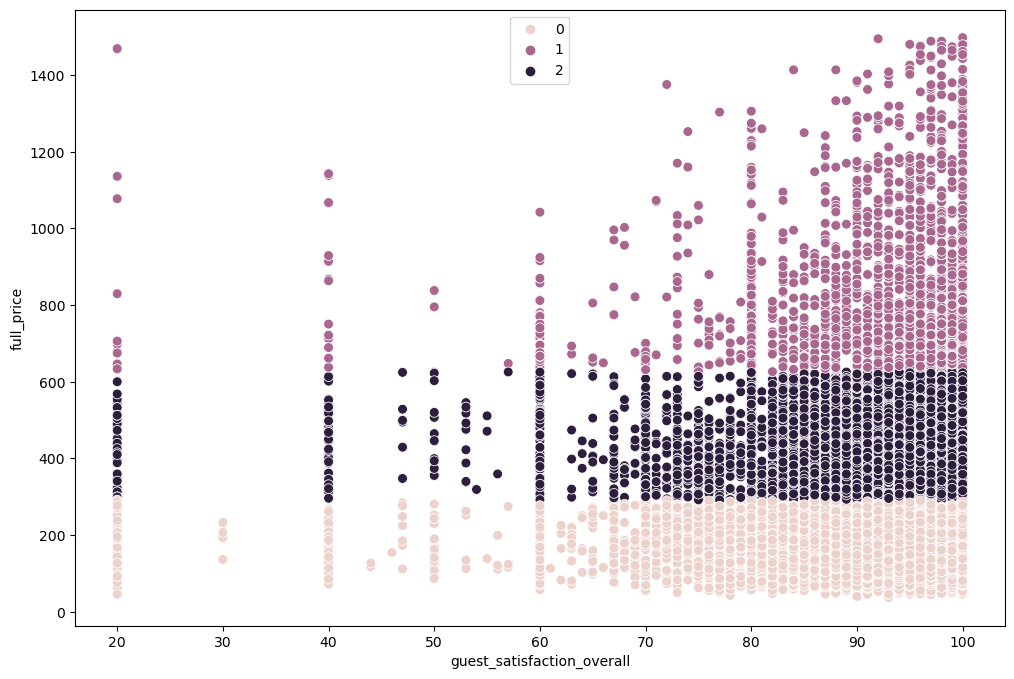

In [74]:
# Plotting clusters for: guest_satisfaction_overall and full_price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_noout['guest_satisfaction_overall'], y=df_noout['full_price'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('guest_satisfaction_overall')
plt.ylabel('full_price') 
plt.show()

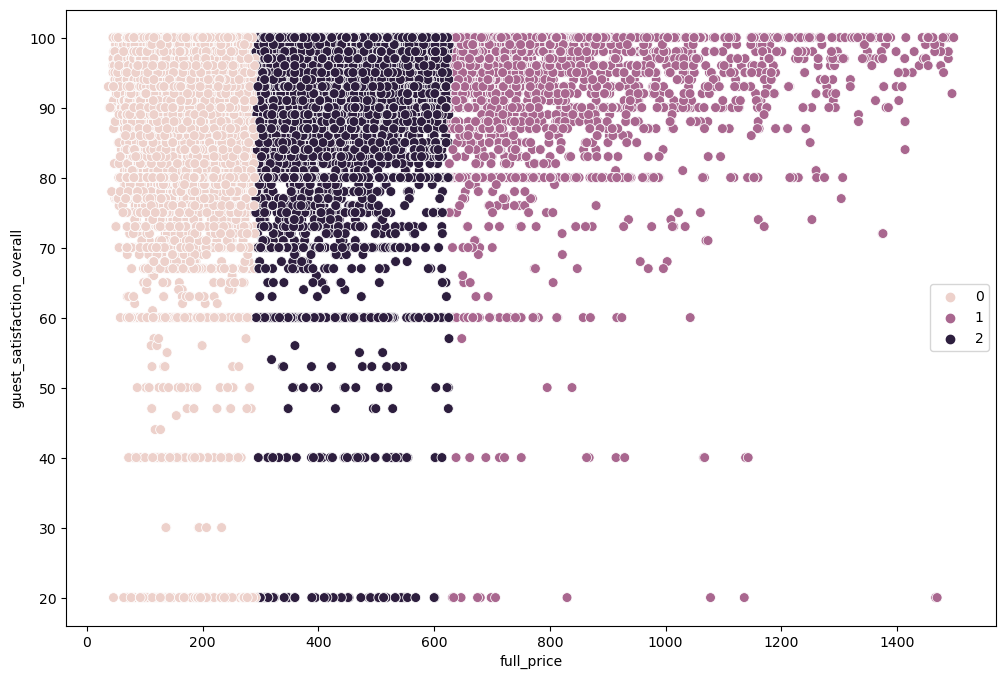

In [76]:
# Plotting clusters for: full_price and guest_satisfaction_overall

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_noout['full_price'], y=df_noout['guest_satisfaction_overall'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('full_price')
plt.ylabel('guest_satisfaction_overall') 
plt.show()

In [80]:
df_noout['clusters'].value_counts()

0    36233
2    12192
1     2708
Name: clusters, dtype: int64

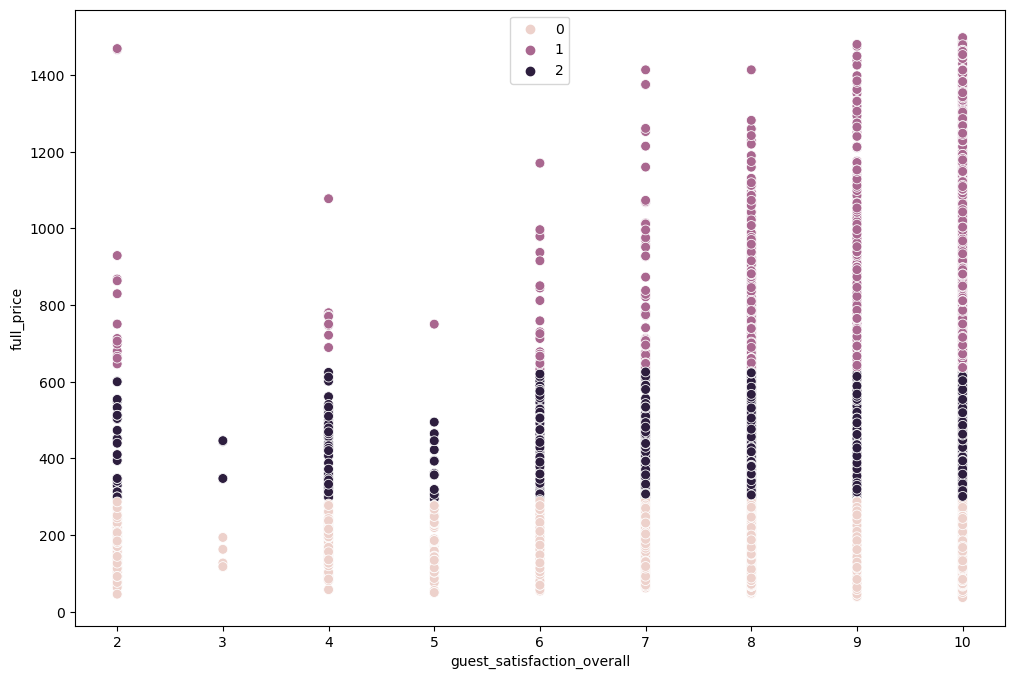

In [73]:
# Plotting clusters for: cleanliness_rating and full_price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_noout['cleanliness_rating'], y=df_noout['full_price'], hue=kmeans.labels_, s=50) 


ax.grid(False) 
plt.xlabel('guest_satisfaction_overall')
plt.ylabel('full_price') 
plt.show()

The clusters do not show any sigificant inside. There seem to be no corelation between the price of the accomodation and the other analyzed value. The way the clusters are located suggest that the price is barely related to the satisfaction, distance or clininess. The visualizations show that the cheapest accomodations can have any of the analyzed values, however the more expensive cluster tends to represent only high satisfaction, high level of cleanliness, short distance to metro and to the center. 


### 5. Statistics

In [102]:
df_noout.loc[df_noout['clusters'] == 2, 'cluster'] = 'black'
df_noout.loc[df_noout['clusters'] == 1, 'cluster'] = 'purple'
df_noout.loc[df_noout['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\3001901130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout.loc[df_noout['clusters'] == 2, 'cluster'] = 'black'


In [105]:
df_noout.groupby('cluster').agg({'cleanliness_rating':['mean', 'median'], 
                         'distance_to_center':['mean', 'median'], 
                        'distance_to_metro':['mean', 'median'],
                         'guest_satisfaction_overall':['mean', 'median'],
                          'full_price':['mean', 'median']})

cleanliness_rating        distance_to_center            \
                      mean median               mean    median   
cluster                                                          
black             9.347277   10.0           3.039044  2.597838   
pink              9.406121   10.0           3.185043  2.618840   
purple            9.366691   10.0           2.760945  2.321312   

        distance_to_metro           guest_satisfaction_overall         \
                     mean    median                       mean median   
cluster                                                                 
black            0.573034  0.357585                  91.940207   95.0   
pink             0.686040  0.434763                  92.831949   95.0   
purple           0.499225  0.340476                  92.653619   96.0   

         full_price              
               mean      median  
cluster                          
black    406.184766  384.146341  
pink     176.989294  173.006336  
purple   845.982554  784.336700

Since there is no clear conclusions based on the sofar analysis, in next steps, some segments of the data shall be analyzed separetely (eg. trends just for highest priced places, just for weekend or each city separetely) 